In [157]:
import pandas as pd
from matplotlib import pyplot as plt

In [158]:
immo_dataset = pd.read_csv('fulldata.csv')

immo_dataset.head(15)


,locality,postal_code,region,property_type,subtype_property,price,contruction_year,type_of_sale,number_of_rooms,living_area,...,has_open_fire,has_terrace,terrace_area,has_garden,garden_surface,habitable_surface,plot_land_surface,number_of_facades,has_swimming_pool,building_state
0,Deinze,9800,Flanders,APARTMENT,APARTMENT,395000.0,2023.0,residential_sale,2,22.0,...,0,1,12.0,1,NaN,99.0,NaN,4.0,0,AS_NEW
1,Halle,1500,Flanders,HOUSE,HOUSE,385000.0,NaN,residential_sale,3,NaN,...,0,0,NaN,0,NaN,158.0,NaN,NaN,0,NaN
2,Antwerp,2060,Flanders,APARTMENT,APARTMENT,140000.0,NaN,residential_sale,1,NaN,...,0,1,8.0,0,NaN,44.0,NaN,NaN,0,NaN
3,Antwerp,2018,Flanders,APARTMENT,APARTMENT,215000.0,NaN,residential_sale,2,NaN,...,0,0,NaN,0,NaN,75.0,NaN,NaN,0,NaN
4,Edegem,2650,Flanders,APARTMENT,APARTMENT,349900.0,NaN,residential_sale,2,NaN,...,0,1,NaN,0,NaN,103.0,NaN,NaN,0,NaN
5,Tremelo,3128,Flanders,HOUSE,HOUSE,380000.0,1993.0,residential_sale,4,40.0,...,0,1,NaN,0,NaN,220.0,863.0,4.0,0,TO_RENOVATE
6,Tielt-Winge,3390,Flanders,HOUSE,HOUSE,510000.0,2024.0,residential_sale,5,30.0,...,0,1,NaN,0,NaN,224.0,693.0,3.0,0,AS_NEW
7,Denderleeuw,9470,Flanders,HOUSE,HOUSE,339000.0,NaN,residential_sale,3,NaN,...,0,1,NaN,0,NaN,165.0,NaN,NaN,0,NaN
8,Knokke,8300,Flanders,APARTMENT,APARTMENT,765000.0,NaN,residential_sale,2,NaN,...,0,1,10.0,0,NaN,96.0,NaN,NaN,0,NaN
9,Molenbeek-Saint-Jean,1080,Brussels,APARTMENT,APARTMENT,339000.0,NaN,residential_sale,3,NaN,...,1,0,NaN,0,NaN,140.0,NaN,NaN,0,NaN


In [159]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   locality               11243 non-null  object 
 1   postal_code            11243 non-null  object 
 2   region                 11171 non-null  object 
 3   property_type          11243 non-null  object 
 4   subtype_property       11243 non-null  object 
 5   price                  11242 non-null  float64
 6   contruction_year       2406 non-null   float64
 7   type_of_sale           11243 non-null  object 
 8   number_of_rooms        11243 non-null  int64  
 9   living_area            3438 non-null   float64
 10  kitchen_fully_equiped  3438 non-null   float64
 11  is_furnished           11243 non-null  int64  
 12  has_open_fire          11243 non-null  int64  
 13  has_terrace            11243 non-null  int64  
 14  terrace_area           4678 non-null   float64
 15  ha

Data Cleaning

Fill empty values

In [160]:
#immo_dataset_replace_y_n = immo_dataset.replace({'Yes': 1, 'No': 0}) 
#immo_dataset_replace_y_n.head(10)


In [161]:
immo_dataset[['contruction_year', 'building_state']].to_csv('test3.csv')


In [162]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

locality                  0.000000
postal_code               0.000000
region                    0.640398
property_type             0.000000
subtype_property          0.000000
price                     0.008894
contruction_year         78.600018
type_of_sale              0.000000
number_of_rooms           0.000000
living_area              69.420973
kitchen_fully_equiped    69.420973
is_furnished              0.000000
has_open_fire             0.000000
has_terrace               0.000000
terrace_area             58.391888
has_garden                0.000000
garden_surface           78.004091
habitable_surface         5.398915
plot_land_surface        75.673753
number_of_facades        73.974918
has_swimming_pool         0.000000
building_state           73.049898
dtype: float64


Replace space in postal_code

In [163]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace(' ', '')

In [164]:
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('MK', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AN', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('KA', '')
immo_dataset['postal_code'] = immo_dataset['postal_code'].str.replace('AG', '')

We dropped columns from main data because it had hight % of missing values.

In [165]:
drop_columns = ['locality', 'contruction_year', 'living_area', 'kitchen_fully_equiped', 'terrace_area', 'garden_surface', 'plot_land_surface', 'number_of_facades', 'building_state']
immo_dataset.drop(drop_columns , axis=1, inplace=True)
immo_dataset.head(10)


,postal_code,region,property_type,subtype_property,price,type_of_sale,number_of_rooms,is_furnished,has_open_fire,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,9800,Flanders,APARTMENT,APARTMENT,395000.0,residential_sale,2,0,0,1,1,99.0,0
1,1500,Flanders,HOUSE,HOUSE,385000.0,residential_sale,3,0,0,0,0,158.0,0
2,2060,Flanders,APARTMENT,APARTMENT,140000.0,residential_sale,1,0,0,1,0,44.0,0
3,2018,Flanders,APARTMENT,APARTMENT,215000.0,residential_sale,2,0,0,0,0,75.0,0
4,2650,Flanders,APARTMENT,APARTMENT,349900.0,residential_sale,2,0,0,1,0,103.0,0
5,3128,Flanders,HOUSE,HOUSE,380000.0,residential_sale,4,0,0,1,0,220.0,0
6,3390,Flanders,HOUSE,HOUSE,510000.0,residential_sale,5,0,0,1,0,224.0,0
7,9470,Flanders,HOUSE,HOUSE,339000.0,residential_sale,3,0,0,1,0,165.0,0
8,8300,Flanders,APARTMENT,APARTMENT,765000.0,residential_sale,2,1,0,1,0,96.0,0
9,1080,Brussels,APARTMENT,APARTMENT,339000.0,residential_sale,3,0,1,0,0,140.0,0


In [166]:
duplicate_rows = immo_dataset.duplicated()
duplicate_data = immo_dataset[duplicate_rows]

print(duplicate_data)

      postal_code    region property_type subtype_property      price   
191          2830  Flanders     APARTMENT        APARTMENT   225000.0  \
218          4820  Wallonie     APARTMENT        APARTMENT    99000.0   
255          1300  Wallonie     APARTMENT        APARTMENT   299000.0   
315          4101  Wallonie         HOUSE            HOUSE   239500.0   
479          1180  Brussels     APARTMENT        APARTMENT   245000.0   
...           ...       ...           ...              ...        ...   
11125        6120  Wallonie         HOUSE            HOUSE   374000.0   
11133        9060  Flanders     APARTMENT        APARTMENT   149000.0   
11172        9500  Flanders         HOUSE            HOUSE   125000.0   
11194        1180  Brussels         HOUSE            HOUSE  1450000.0   
11212        1070  Brussels         HOUSE            HOUSE   749000.0   

           type_of_sale  number_of_rooms  is_furnished  has_open_fire   
191    residential_sale                3          

In [167]:
immo_dataset = immo_dataset.reset_index(drop=True)

In [168]:
immo_dataset.drop_duplicates(inplace=True)
immo_dataset.to_csv('immo_clean1.csv')

In [169]:
immo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10945 entries, 0 to 11242
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10945 non-null  object 
 1   region             10873 non-null  object 
 2   property_type      10945 non-null  object 
 3   subtype_property   10945 non-null  object 
 4   price              10944 non-null  float64
 5   type_of_sale       10945 non-null  object 
 6   number_of_rooms    10945 non-null  int64  
 7   is_furnished       10945 non-null  int64  
 8   has_open_fire      10945 non-null  int64  
 9   has_terrace        10945 non-null  int64  
 10  has_garden         10945 non-null  int64  
 11  habitable_surface  10351 non-null  float64
 12  has_swimming_pool  10945 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.2+ MB


In [170]:
#remove space from all columns
immo_dataset_space_removed = immo_dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print(immo_dataset_space_removed)

      postal_code    region property_type subtype_property     price   
0            9800  Flanders     APARTMENT        APARTMENT  395000.0  \
1            1500  Flanders         HOUSE            HOUSE  385000.0   
2            2060  Flanders     APARTMENT        APARTMENT  140000.0   
3            2018  Flanders     APARTMENT        APARTMENT  215000.0   
4            2650  Flanders     APARTMENT        APARTMENT  349900.0   
...           ...       ...           ...              ...       ...   
11238        2830  Flanders     APARTMENT        APARTMENT  289000.0   
11239        2830  Flanders     APARTMENT        APARTMENT  291000.0   
11240        2830  Flanders     APARTMENT        APARTMENT  281000.0   
11241        2990  Flanders         HOUSE            HOUSE  225000.0   
11242        2830  Flanders     APARTMENT        APARTMENT  309000.0   

           type_of_sale  number_of_rooms  is_furnished  has_open_fire   
0      residential_sale                2             0        

In [171]:
#Find empty values
empty_values = immo_dataset.isna()

#Count the number of empty values in each column
empty_count = empty_values.sum()

#Display the columns with empty values
print("Columns with empty values:")
print(empty_count[empty_count > 0])

Columns with empty values:
region                72
price                  1
habitable_surface    594
dtype: int64


Data Analysis

In [172]:
immo_dataset.shape

(10945, 13)

In [173]:
immo_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10945 entries, 0 to 11242
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   postal_code        10945 non-null  object 
 1   region             10873 non-null  object 
 2   property_type      10945 non-null  object 
 3   subtype_property   10945 non-null  object 
 4   price              10944 non-null  float64
 5   type_of_sale       10945 non-null  object 
 6   number_of_rooms    10945 non-null  int64  
 7   is_furnished       10945 non-null  int64  
 8   has_open_fire      10945 non-null  int64  
 9   has_terrace        10945 non-null  int64  
 10  has_garden         10945 non-null  int64  
 11  habitable_surface  10351 non-null  float64
 12  has_swimming_pool  10945 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.2+ MB


In [174]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

postal_code          0.000000
region               0.657835
property_type        0.000000
subtype_property     0.000000
price                0.009137
type_of_sale         0.000000
number_of_rooms      0.000000
is_furnished         0.000000
has_open_fire        0.000000
has_terrace          0.000000
has_garden           0.000000
habitable_surface    5.427136
has_swimming_pool    0.000000
dtype: float64


In [175]:
correlation_coefficient = immo_dataset['price'].corr(immo_dataset['habitable_surface'])
print(correlation_coefficient)

0.5269583844662235


Find correlation between price and other variables

In [176]:
import numpy as np
numeric_columns = ['postal_code', 'price', 'number_of_rooms',
                   'is_furnished', 'has_open_fire', 'has_terrace',
                   'has_garden', 'habitable_surface', 'has_swimming_pool']

categorical_columns = ['region', 'property_type', 'subtype_property', 'type_of_sale']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

correlation_coefficient = encoded_data.corr()[['price']]

# Print the correlation coefficients

print(correlation_coefficient.sort_values(by=['price'], ascending=False))

                                                  price
price                                          1.000000
habitable_surface                              0.526958
number_of_rooms                                0.326859
has_swimming_pool                              0.234510
region_Brussels                                0.165630
has_terrace                                    0.090021
has_garden                                     0.056020
subtype_property_HOUSE                         0.049287
property_type_HOUSE                            0.049287
type_of_sale_residential_sale                  0.039599
region_Flanders                                0.026187
is_furnished                                   0.008029
type_of_sale_annuity_lump_sum                 -0.007243
type_of_sale_first_session_with_reserve_price -0.009419
has_open_fire                                 -0.033339
type_of_sale_annuity_monthly_amount           -0.038356
property_type_APARTMENT                       -0

In [177]:
#Select the correlation values of "price" column with other columns
price_correlation = correlation_coefficient['price'].drop('price')
print(price_correlation.sort_values(ascending=False))

habitable_surface                                0.526958
number_of_rooms                                  0.326859
has_swimming_pool                                0.234510
region_Brussels                                  0.165630
has_terrace                                      0.090021
has_garden                                       0.056020
subtype_property_HOUSE                           0.049287
property_type_HOUSE                              0.049287
type_of_sale_residential_sale                    0.039599
region_Flanders                                  0.026187
is_furnished                                     0.008029
type_of_sale_annuity_lump_sum                   -0.007243
type_of_sale_first_session_with_reserve_price   -0.009419
has_open_fire                                   -0.033339
type_of_sale_annuity_monthly_amount             -0.038356
property_type_APARTMENT                         -0.049287
subtype_property_APARTMENT                      -0.049287
postal_code   

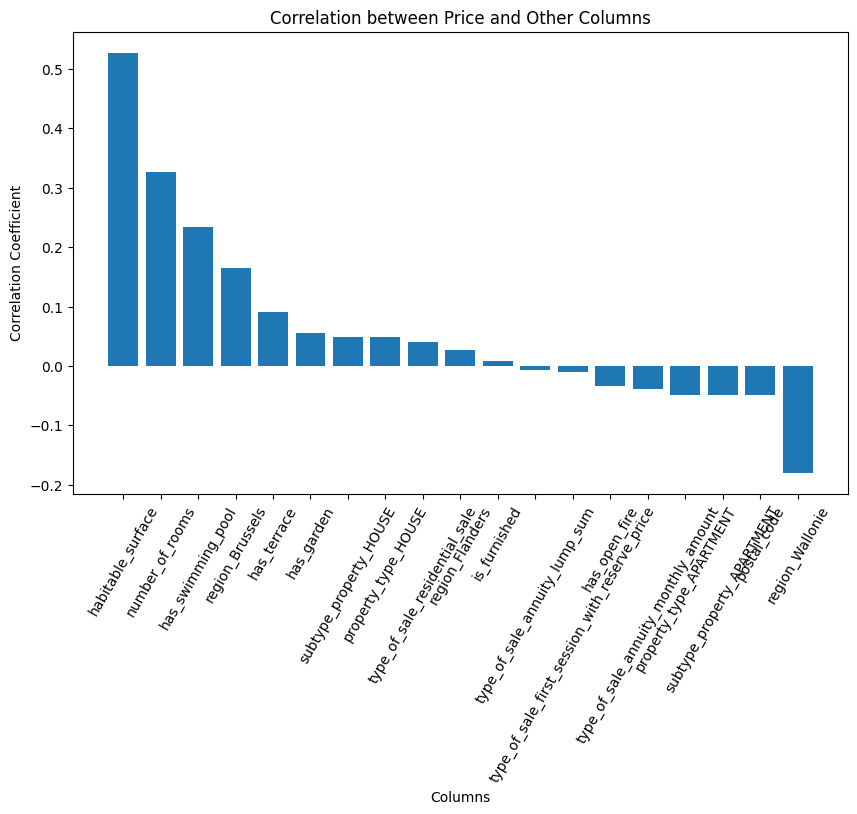

In [178]:
# Assuming you have the correlation values stored in the 'price_correlation' variable

# Sort the correlation values in descending order
sorted_correlation = price_correlation.sort_values(ascending=False)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_correlation.index, sorted_correlation.values)
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Price and Other Columns')
plt.xticks(rotation=60)
plt.show()


How are variables correlated to each other? 

In [185]:
drop_columns_type = ['type_of_sale']
immo_dataset_no_type_of_sale = immo_dataset.drop(drop_columns_type, axis=1)
immo_dataset_no_type_of_sale.head(10)

,postal_code,region,property_type,subtype_property,price,number_of_rooms,is_furnished,has_open_fire,has_terrace,has_garden,habitable_surface,has_swimming_pool
0,9800,Flanders,APARTMENT,APARTMENT,395000.0,2,0,0,1,1,99.0,0
1,1500,Flanders,HOUSE,HOUSE,385000.0,3,0,0,0,0,158.0,0
2,2060,Flanders,APARTMENT,APARTMENT,140000.0,1,0,0,1,0,44.0,0
3,2018,Flanders,APARTMENT,APARTMENT,215000.0,2,0,0,0,0,75.0,0
4,2650,Flanders,APARTMENT,APARTMENT,349900.0,2,0,0,1,0,103.0,0
5,3128,Flanders,HOUSE,HOUSE,380000.0,4,0,0,1,0,220.0,0
6,3390,Flanders,HOUSE,HOUSE,510000.0,5,0,0,1,0,224.0,0
7,9470,Flanders,HOUSE,HOUSE,339000.0,3,0,0,1,0,165.0,0
8,8300,Flanders,APARTMENT,APARTMENT,765000.0,2,1,0,1,0,96.0,0
9,1080,Brussels,APARTMENT,APARTMENT,339000.0,3,0,1,0,0,140.0,0


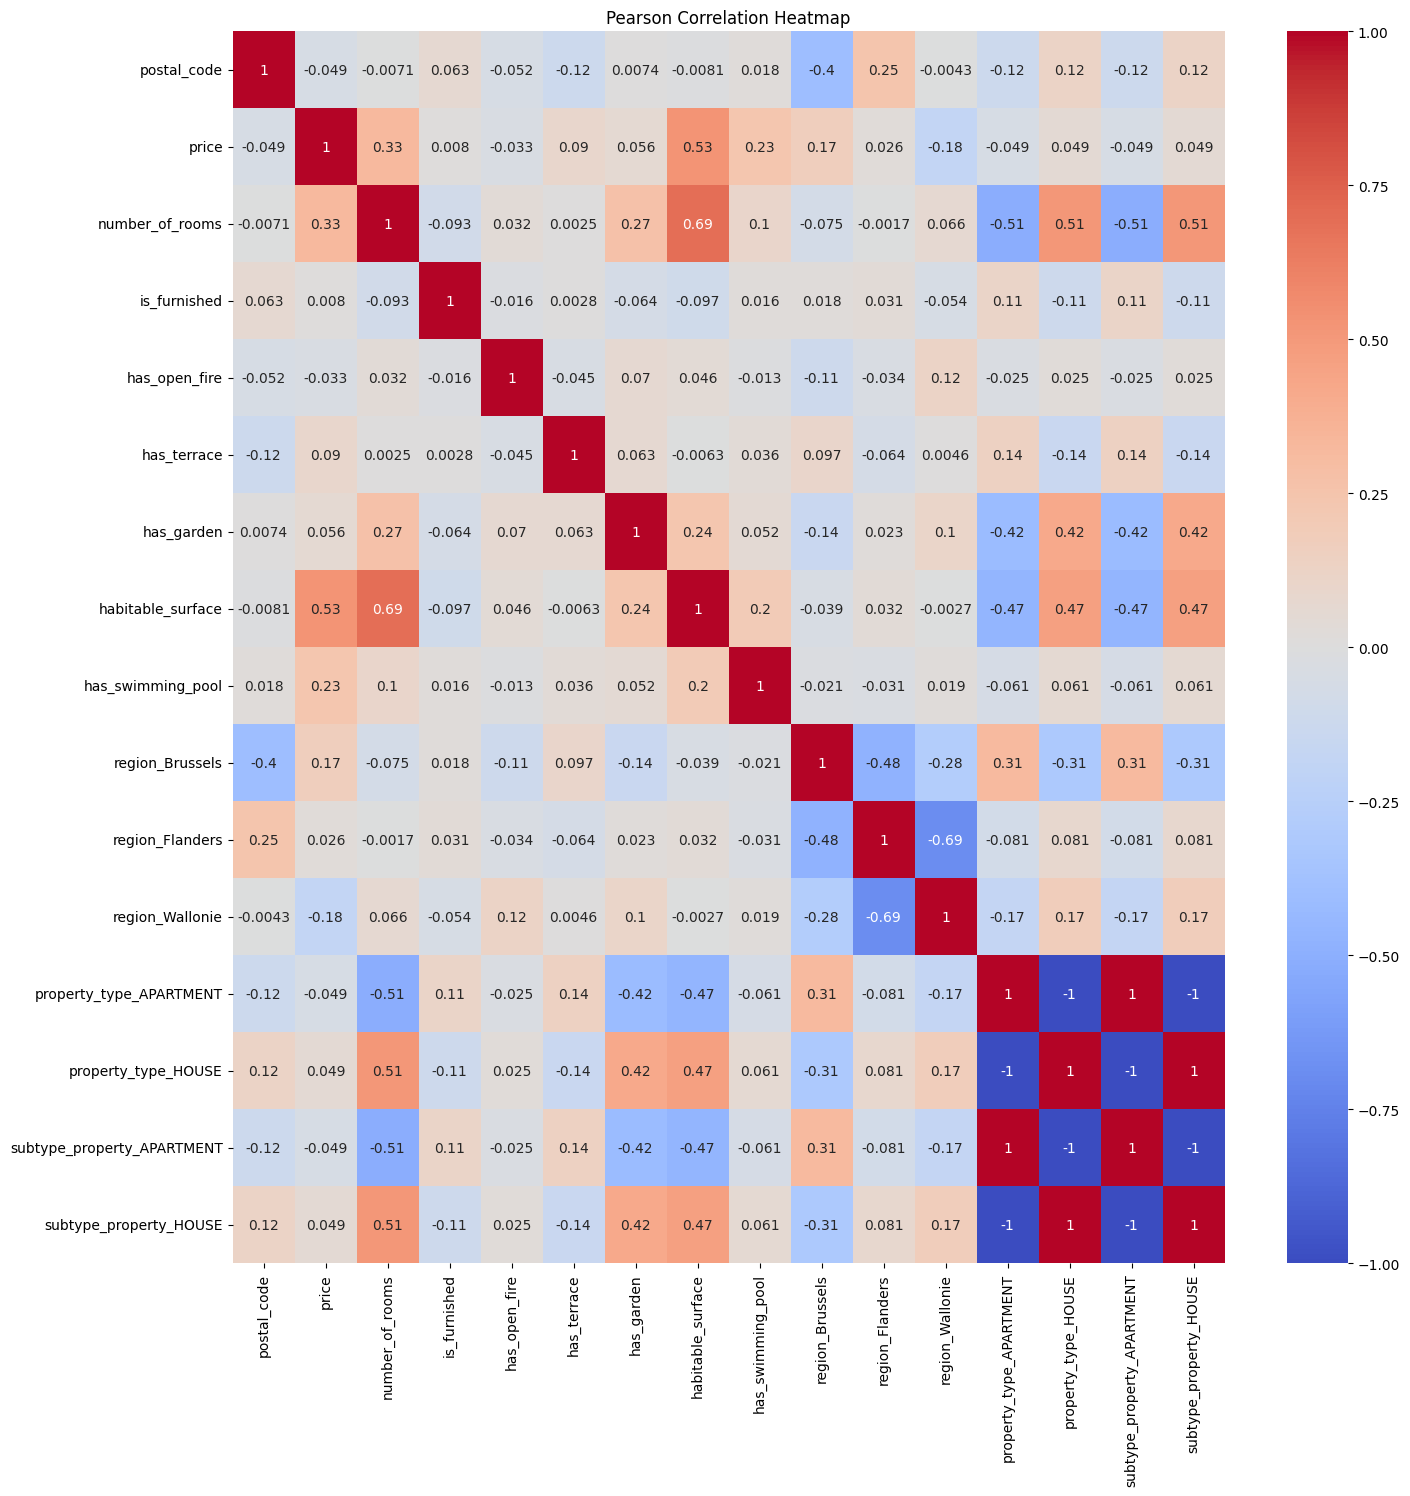

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataset stored in the 'immo_dataset' variable

# Select the numeric columns for correlation analysis
#numeric_columns = immo_dataset.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = ['postal_code', 'price', 'number_of_rooms',
                   'is_furnished', 'has_open_fire', 'has_terrace',
                   'has_garden', 'habitable_surface', 'has_swimming_pool']

categorical_columns = ['region', 'property_type', 'subtype_property']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset_no_type_of_sale, columns=categorical_columns)

#correlation_coefficient = encoded_data.corr()

# Print the correlation coefficients

#print(correlation_coefficient)
# Calculate the correlation using Pearson method
pearson_corr = encoded_data.corr(method='pearson')

# Plotting the correlation heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

In [179]:
# Read the dataset into a pandas DataFrame
#data = pd.read_csv("your_dataset.csv")
# Select the numeric columns for correlation analysis
numeric_columns = immo_dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation using Pearson method
pearson_corr = immo_dataset[numeric_columns].corr(method='pearson')

# Calculate the correlation using Spearman method
#spearman_corr = immo_dataset[numeric_columns].corr(method='spearman')

# Print the correlation values
print("Pearson correlation:\n", pearson_corr)
#print("\nSpearman correlation:\n", spearman_corr)

Pearson correlation:
                       price  number_of_rooms  is_furnished  has_open_fire   
price              1.000000         0.326859      0.008029      -0.033339  \
number_of_rooms    0.326859         1.000000     -0.093429       0.032045   
is_furnished       0.008029        -0.093429      1.000000      -0.016285   
has_open_fire     -0.033339         0.032045     -0.016285       1.000000   
has_terrace        0.090021         0.002510      0.002811      -0.045031   
has_garden         0.056020         0.267220     -0.063604       0.069629   
habitable_surface  0.526958         0.691105     -0.097243       0.045756   
has_swimming_pool  0.234510         0.101529      0.016319      -0.013175   

                   has_terrace  has_garden  habitable_surface   
price                 0.090021    0.056020           0.526958  \
number_of_rooms       0.002510    0.267220           0.691105   
is_furnished          0.002811   -0.063604          -0.097243   
has_open_fire        -0.

In [180]:
import numpy as np
numeric_columns = ['postal_code', 'price', 'number_of_rooms',
                   'is_furnished', 'has_open_fire', 'has_terrace',
                   'has_garden', 'habitable_surface', 'has_swimming_pool']

categorical_columns = ['region', 'property_type', 'subtype_property', 'type_of_sale']
# Convert the categorical 'locality' column to numerical using one-hot encoding
encoded_data = pd.get_dummies(immo_dataset, columns=categorical_columns)

correlation_coefficient = encoded_data.corr()

# Print the correlation coefficients

print(correlation_coefficient)

                                               postal_code     price   
postal_code                                       1.000000 -0.049488  \
price                                            -0.049488  1.000000   
number_of_rooms                                  -0.007099  0.326859   
is_furnished                                      0.063284  0.008029   
has_open_fire                                    -0.052026 -0.033339   
has_terrace                                      -0.123472  0.090021   
has_garden                                        0.007388  0.056020   
habitable_surface                                -0.008118  0.526958   
has_swimming_pool                                 0.017821  0.234510   
region_Brussels                                  -0.402980  0.165630   
region_Flanders                                   0.246985  0.026187   
region_Wallonie                                  -0.004311 -0.179780   
property_type_APARTMENT                          -0.120720 -0.04

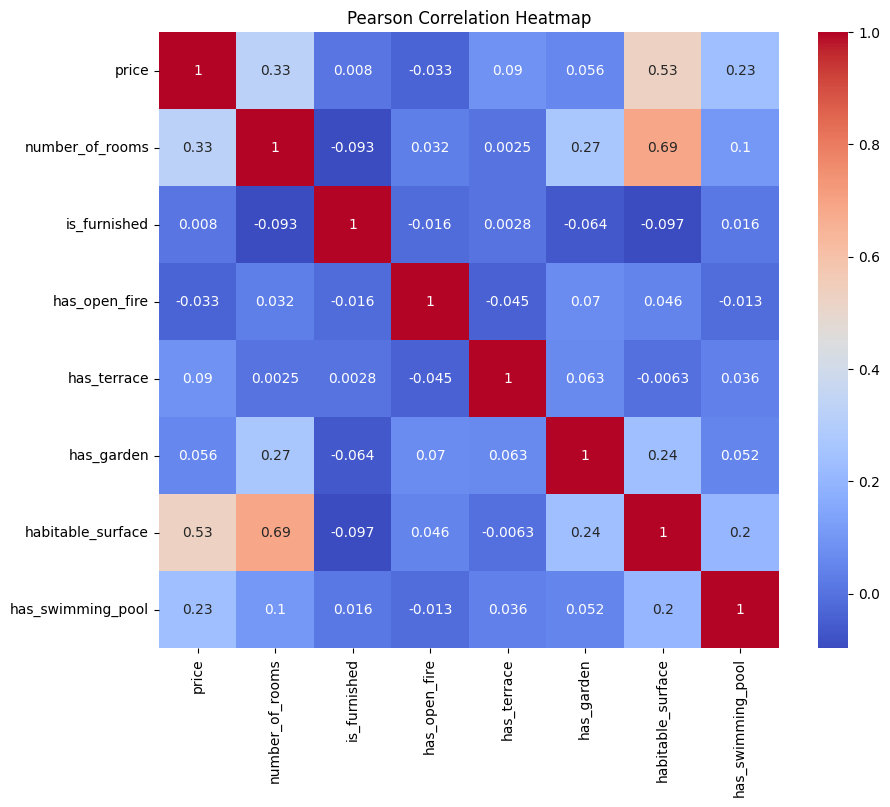

In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the dataset stored in the 'immo_dataset' variable

# Select the numeric columns for correlation analysis
numeric_columns = immo_dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation using Pearson method
pearson_corr = immo_dataset[numeric_columns].corr(method='pearson')

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

Which variables have the greatest influence on the price?

Which variables have the least influence on the price?

How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Percentage of missing values per column?

https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=6

https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=5

In [182]:
missing_percentage = immo_dataset.isna().mean() * 100
print(missing_percentage)

postal_code          0.000000
region               0.657835
property_type        0.000000
subtype_property     0.000000
price                0.009137
type_of_sale         0.000000
number_of_rooms      0.000000
is_furnished         0.000000
has_open_fire        0.000000
has_terrace          0.000000
has_garden           0.000000
habitable_surface    5.427136
has_swimming_pool    0.000000
dtype: float64


Step 3 : Data Interpretation

Plot the outliers.

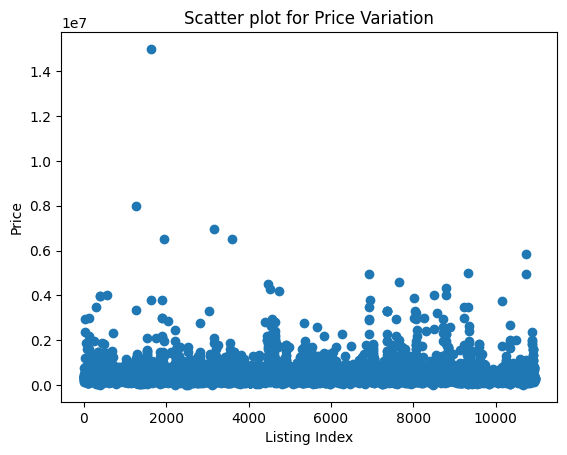

In [189]:
#Convert 'price' column to Pandas Series
price_series = pd.Series(immo_dataset['price'])

#Create the scatter plot
plt.scatter(range(len(price_series)), price_series)

#Set plot title and labels
plt.title('Scatter plot for Price Variation')
plt.xlabel('Listing Index')
plt.ylabel('Price')

#Display the scatter plot
plt.show()

In [ ]:
from scipy import stats

z_scores = stats.zscore(price_series)
threshold = 3  # Choose an appropriate threshold for identifying outliers

outliers = price_series[abs(z_scores) > threshold]

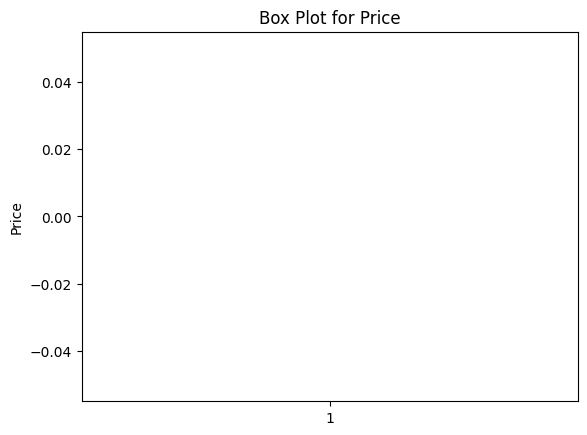

In [191]:
price_series = pd.Series(immo_dataset['price'])
##Box plot: A box plot provides a visual representation of the distribution of a dataset, including information about outliers. You can use the boxplot() function from either Matplotlib or Seaborn to create a box plot of the 'price' column.
plt.boxplot(price_series)
plt.title('Box Plot for Price')
plt.ylabel('Price')
plt.show()

Which variables would you delete and why ?


Represent the number of properties according to their surface using a histogram.


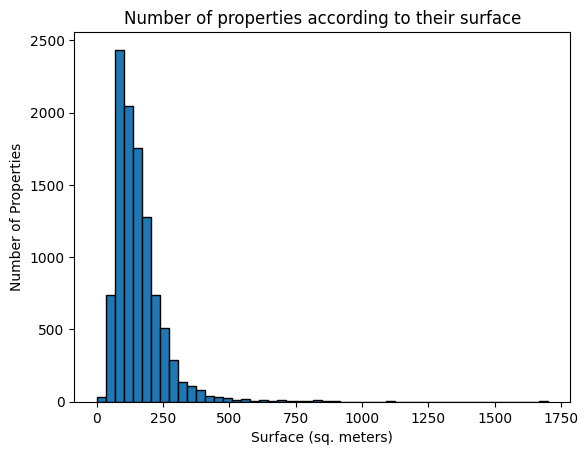

In [183]:
# Extract the 'habitable_surface' data
surface = immo_dataset['habitable_surface']

# Determine the bin intervals
#bin_width = 50
#bins = range(0, int(max(surface)) + bin_width, bin_width)

# Create the histogram
plt.hist(surface, bins=50, edgecolor='black')

# Label the axes and add a title
plt.xlabel('Surface (sq. meters)')
plt.ylabel('Number of Properties')
plt.title('Number of properties according to their surface')

# Display the histogram
plt.show()



In your opinion, which 5 variables are the most important and why?


What are the most expensive municipalities in Belgium? (Average price, median price, price per square meter)


In [ ]:
# Calculate price per square meter
immo_dataset['price_per_sqm'] = immo_dataset['price'] / immo_dataset['habitable_surface']

# Group by region and calculate the average price, median price, and price per square meter
region_stats = immo_dataset.groupby('region').agg(
    average_price=('price', 'mean'),
    median_price=('price', 'median'),
    average_price_per_sqm=('price_per_sqm', 'mean')
)

# Sort the regions based on the index (region names) in ascending order
sorted_regions = region_stats.sort_index()

# Sort the regions based on the average price in descending order
most_expensive_regions = region_stats.sort_values(by='average_price', ascending=False)

# Print the most expensive regions and their corresponding statistics
print("Most Expensive Regions in Belgium:")
print(most_expensive_regions)

# Access specific statistics for a region (e.g., 'Brussels')
brussels_stats = region_stats.loc['Brussels']
print("\nStatistics for Brussels:")
print(brussels_stats)


In [ ]:
# Plotting the most expensive regions
plt.figure(figsize=(10, 6))
most_expensive_regions['average_price'].plot(kind='bar')
plt.title('Most Expensive Regions in Belgium')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What are the most expensive municipalities in Wallonia? (Average price, median price, price per square meter)


In [ ]:

# Filter the dataframe to include only Wallonia (Wallonie) region
wallonia_data = immo_dataset[immo_dataset['region'] == 'Wallonie']

# Group by postal code and calculate the average price
postal_code_stats = wallonia_data.groupby('postal_code')['price'].mean()

# Sort the postal codes based on the average price in descending order
most_expensive_postal_codes = postal_code_stats.sort_values(ascending=False).head(10)

# Plotting the top 10 most expensive postal codes in Wallonia
plt.figure(figsize=(10, 6))
most_expensive_postal_codes.plot(kind='bar')
plt.title('Top 10 Most Expensive Postal Codes in Wallonia')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


What are the most expensive municipalities in Flanders? (Average price, median price, price per square meter)


In [ ]:
# Filter the dataframe to include only Flanders region
flanders_data = immo_dataset[immo_dataset['region'] == 'Flanders']

# Group by postal code and calculate the average price
postal_code_stats = flanders_data.groupby('postal_code')['price'].mean()

# Sort the postal codes based on the average price in descending order
top_10_expensive_postal_codes = postal_code_stats.nlargest(10)

# Plotting the top 10 most expensive postal codes in Flanders
plt.figure(figsize=(10, 6))
top_10_expensive_postal_codes.plot(kind='bar')
plt.title('Top 10 Most Expensive Postal Codes in Flanders')
plt.xlabel('Postal Code')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What are the less expensive municipalities in Belgium? (Average price, median price, price per square meter)


What are the less expensive municipalities in Wallonia? (Average price, median price, price per square meter)


What are the less expensive municipalities in Flanders? (Average price, median price, price per square meter)
